In [1]:
%load_ext autoreload
%autoreload 2

# Kappa Measurement Notebook: Cavity B


In [2]:
PACKAGE = "Mk3"
CAVITY = "B"

In [3]:
from fitting_utils import extract_data_fn, s11, mag_func, phase_func, plot_fit, concat_fit, plot_mag, norm_f, fit_params, plot_phase
from fitting_utils import get_metrics, extract_power_data_fn

In [3]:
try:
    import sys, os
    sys.path.append('C:\Program Files\Labber\Script') 
    import Labber
    from Labber import ScriptTools
    
except:
    print("Unable to import Labber.")
    
import numpy as np
import numpy.linalg
import scipy as sp
import scipy.sparse.linalg
from scipy.optimize import curve_fit
from qutip import *
import pickle
import datetime

import circle_fit as cf

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.reset_defaults()
sns.set_context('paper', font_scale = 1)
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Verdana']

params = {'legend.fontsize': 11,
          'legend.handlelength': 1,
          'legend.handletextpad': 0.5}
mpl.rcParams.update(params)


import os
import glob

Unable to import Labber.


In [4]:
if False:
    dirname = f"..\\..\\..\\bosonic_experiments_data\\20231114_cooldown\\{PACKAGE}\\{CAVITY}\\*.hdf5"
    fitting, filenames = extract_data_fn(dirname)
    np.save(f"analysis_data_{PACKAGE}_{CAVITY}.npy", {"fitting": fitting, "filenames":filenames})

# Load Data

In [5]:
analysis_data = np.load(f"analysis_data_{CAVITY}.npy", allow_pickle=True).item()

In [6]:
list(analysis_data["fitting"].keys())

['..\\..\\bosonic_experiments_data\\20220706_cooldown\\B\\Cavity_B_Msmt_1.hdf5',
 '..\\..\\bosonic_experiments_data\\20220706_cooldown\\B\\Cavity_B_Msmt_IF_Bandwidth_Sweep_0.hdf5',
 '..\\..\\bosonic_experiments_data\\20220706_cooldown\\B\\Cavity_B_Msmt_IF_Bandwidth_Sweep_1.hdf5']

In [7]:
fitting = analysis_data["fitting"]
filenames = analysis_data["filenames"]

In [8]:
good_fit = '..\\..\\bosonic_experiments_data\\20220706_cooldown\\B\\Cavity_B_Msmt_1.hdf5'
fitting = {good_fit: fitting[good_fit]}
filenames = [good_fit]

In [9]:
plot_mag(fitting)
plt.show()

NameError: name 'plot_mag' is not defined

In [10]:
plot_phase(fitting, tau_shift=500, phi_shift=1.05)
plt.show()

NameError: name 'plot_phase' is not defined

# Fitting

Fitting Function Definition:
$$S_{11}(f) = \frac{a[(\kappa_i - \kappa_c) + 2j(f-f_0)]}{(\kappa_c + \kappa_i) + 2j(f-f_0)}$$

In [11]:
filename = filenames[0]
filename

'..\\..\\bosonic_experiments_data\\20220706_cooldown\\B\\Cavity_B_Msmt_1.hdf5'

In [12]:
f = fitting[filename]['x']
s11_raw = fitting[filename]['y']

In [13]:
import abcd_rf_fit as abcd

In [14]:
s11 = s11_raw * np.exp(1j * f * 0.75*np.pi)

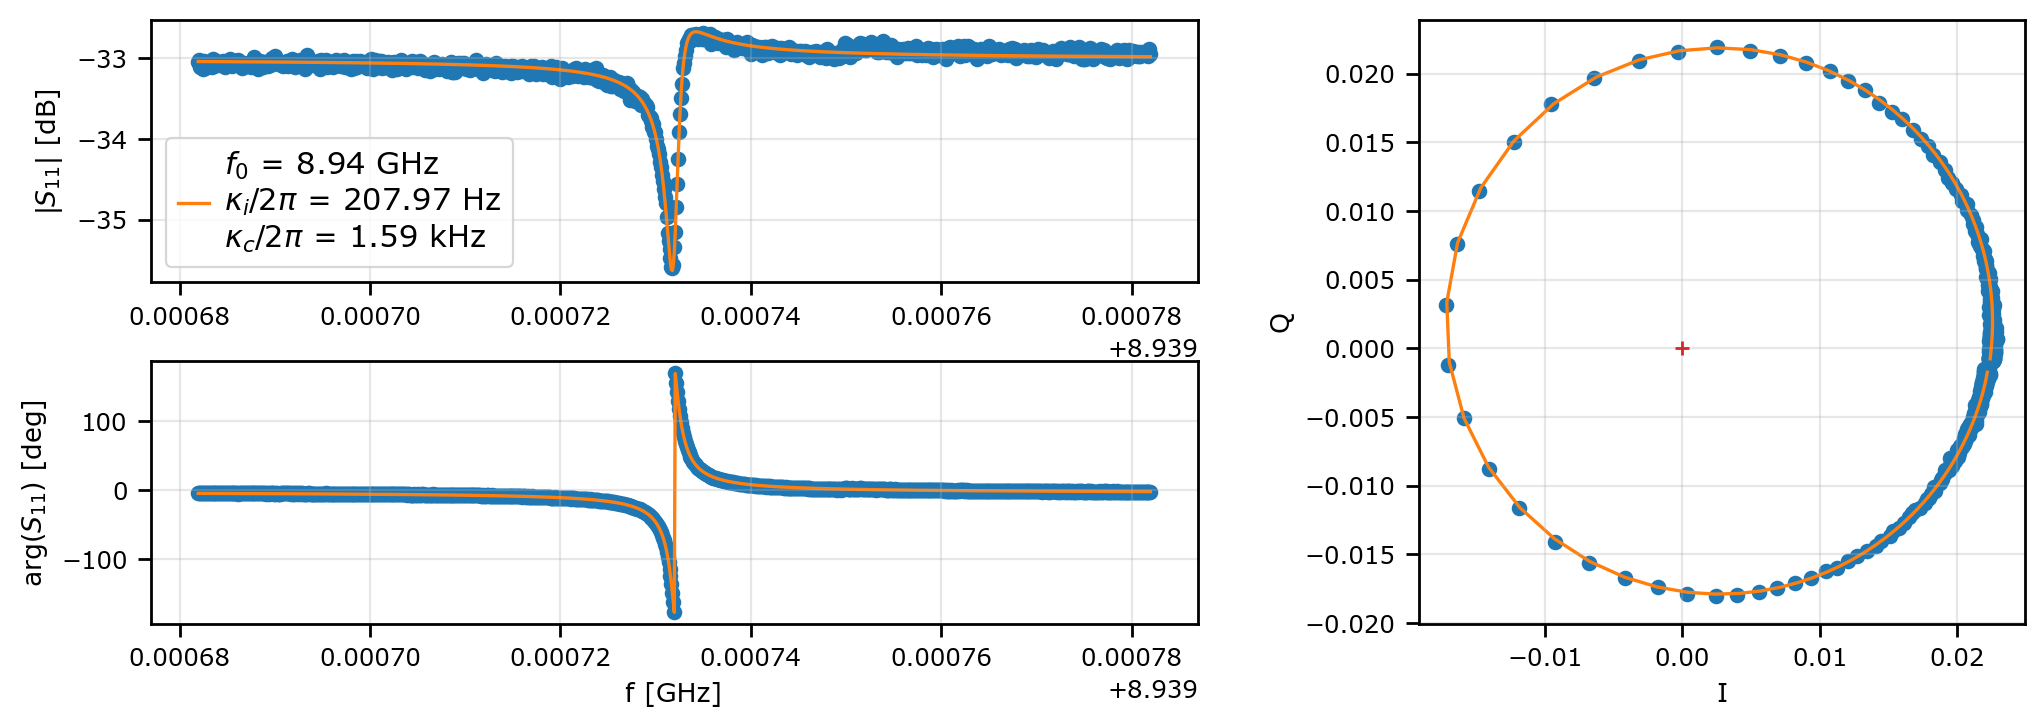

In [15]:
fit_func, fit_params = abcd.fit_signal(f * 1e9, s11, 'r', final_ls_opti=True)
fit = fit_func(f * 1e9, *fit_params.tolist())

# Set edelay → 0 for plotting
fit_params.params[-1] = 0

fig = plt.figure(figsize=(16, 4), dpi=200)

abcd.plot(f * 1e9, s11, fit, fit_params=fit_params, plot_not_corrected=False, fig=fig, only_f_and_kappa=True)

plt.subplots_adjust(wspace=1)

plt.savefig("Storage_Res_Fit.pdf", bbox_inches='tight')
plt.show()

In [16]:
# Get T1i in μs
1e6 / (2*np.pi*fit_params.kappa_i)

765.272370967802